In [1]:
import sys
import os

sys.path.append(os.path.dirname(os.getcwd()))

os.chdir("../")

## Sanity Check: Load Param files

In [12]:
import numpy as np

In [13]:
meps_weights = np.load("/vol/bitbucket/bet20/neural-lam/data/meps_example/static/parameter_weights.npy")
print(meps_weights.shape)
meps_weights

(17,)


array([0.1  , 0.1  , 0.1  , 0.1  , 1.   , 0.065, 1.   , 0.065, 0.03 ,
       0.05 , 0.065, 0.05 , 0.065, 0.05 , 0.1  , 0.1  , 0.03 ],
      dtype=float32)

In [14]:
era5_weights = np.load("/vol/bitbucket/bet20/neural-lam/data/era5_uk/static/parameter_weights.npy")
print(era5_weights.shape)
era5_weights

(3705, 48)


array([[0.00018333, 0.00054998, 0.00091663, ..., 0.00219991, 0.00311654,
        0.00366651],
       [0.00018489, 0.00055468, 0.00092447, ..., 0.00221873, 0.0031432 ,
        0.00369788],
       [0.00018646, 0.00055938, 0.00093229, ..., 0.0022375 , 0.00316979,
        0.00372917],
       ...,
       [0.00027281, 0.00081843, 0.00136405, ..., 0.00327372, 0.00463777,
        0.00545619],
       [0.00027411, 0.00082232, 0.00137053, ..., 0.00328927, 0.00465981,
        0.00548212],
       [0.0002754 , 0.00082619, 0.00137699, ..., 0.00330477, 0.00468176,
        0.00550795]], dtype=float32)

# Parameter weighting

In [15]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from neural_lam.constants import ERA5UKConstants

In [16]:
levels = np.array(ERA5UKConstants.LEVELS).astype(int)

weighting = levels / sum(levels) # (N_levels,)
weighting = np.tile(weighting, 6) # (N_levels * N_vars)

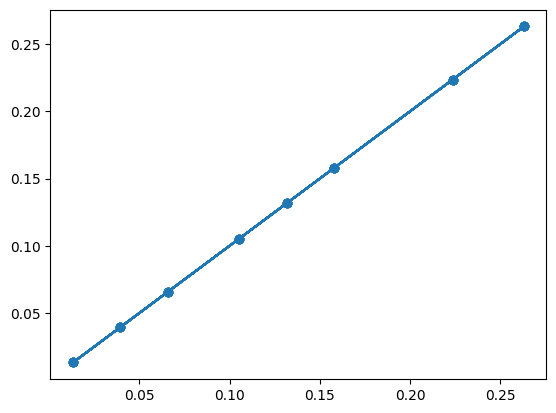

In [20]:
fig, ax = plt.subplots()

ax.plot(weighting, weighting, marker='o')

### numpy version

In [17]:
# load nwp_xy.npy
static_dir_path = "data/era5_uk/static"
grid_xy = np.load(os.path.join(static_dir_path, "nwp_xy.npy")) # (2, N_x, N_y)
_, _, n_lat = grid_xy.shape
print(grid_xy.shape)
grid_xy = grid_xy.reshape(2, -1).T # (N_x * N_y, 2)
print(grid_xy.shape)
lats = grid_xy[:, 1] # (N_x * N_y,)
cos_lats = np.cos(np.deg2rad(lats))
lat_weights = n_lat * cos_lats / cos_lats.sum() # scale to unit mean over grid 
print(lat_weights.shape)
param_weights = np.expand_dims(lat_weights, axis=1) * weighting
print(param_weights.shape)

(2, 57, 65)
(3705, 2)
(3705,)
(3705, 48)


In [24]:
lats

array([63.  , 62.75, 62.5 , ..., 47.5 , 47.25, 47.  ], dtype=float32)

In [23]:
print(cos_lats)

[0.45399055 0.45787394 0.4617486  ... 0.67559016 0.67880076 0.6819983 ]


## torch version

In [5]:
# load nwp_xy.npy
static_dir_path = "data/era5_uk/static"
grid_xy = torch.tensor(
    np.load(os.path.join(static_dir_path, "nwp_xy.npy"))
)  # (2, N_x, N_y)
_, _, n_lat = grid_xy.shape
print(grid_xy.shape)
grid_xy = grid_xy.reshape(2, -1).T # (N_x * N_y, 2)
print(grid_xy.shape)
lats = grid_xy[:, 1] # (N_x * N_y,)
cos_lats = torch.cos(torch.deg2rad(lats))
lat_weights = n_lat * cos_lats / cos_lats.sum() # scale to unit mean over grid 
lat_weights = lat_weights.unsqueeze(1) * weighting
print(lat_weights.shape)

torch.Size([2, 57, 65])
torch.Size([3705, 2])
torch.Size([3705, 48])


In [6]:
lat_weights

tensor([[0.0002, 0.0005, 0.0009,  ..., 0.0022, 0.0031, 0.0037],
        [0.0002, 0.0006, 0.0009,  ..., 0.0022, 0.0031, 0.0037],
        [0.0002, 0.0006, 0.0009,  ..., 0.0022, 0.0032, 0.0037],
        ...,
        [0.0003, 0.0008, 0.0014,  ..., 0.0033, 0.0046, 0.0055],
        [0.0003, 0.0008, 0.0014,  ..., 0.0033, 0.0047, 0.0055],
        [0.0003, 0.0008, 0.0014,  ..., 0.0033, 0.0047, 0.0055]],
       dtype=torch.float64)

In [7]:
lat_weights = lat_weights.numpy()

In [8]:
np.isclose(param_weights, lat_weights).all()

True

In [9]:
weighting

array([0.01315789, 0.03947368, 0.06578947, 0.10526316, 0.13157895,
       0.15789474, 0.22368421, 0.26315789, 0.01315789, 0.03947368,
       0.06578947, 0.10526316, 0.13157895, 0.15789474, 0.22368421,
       0.26315789, 0.01315789, 0.03947368, 0.06578947, 0.10526316,
       0.13157895, 0.15789474, 0.22368421, 0.26315789, 0.01315789,
       0.03947368, 0.06578947, 0.10526316, 0.13157895, 0.15789474,
       0.22368421, 0.26315789, 0.01315789, 0.03947368, 0.06578947,
       0.10526316, 0.13157895, 0.15789474, 0.22368421, 0.26315789,
       0.01315789, 0.03947368, 0.06578947, 0.10526316, 0.13157895,
       0.15789474, 0.22368421, 0.26315789])

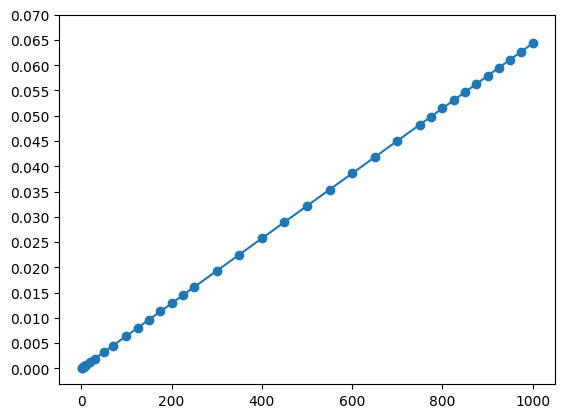

In [ ]:
pressure_levels = np.array([1, 2, 3, 5, 7, 10, 20, 30, 50, 70, 100, 125, 150, 175, 200, 225, 250, 300, 350,
400, 450, 500, 550, 600, 650, 700, 750, 775, 800, 825, 850, 875, 900, 925, 950, 975, 1000])
# x_axis = np.linspace(0, )

weighting = pressure_levels / sum(pressure_levels)
fig, ax = plt.subplots()

ax.plot(pressure_levels, weighting, marker='o')
y_ticks = np.arange(0, 0.07, 0.005)
ax.set_yticks(y_ticks)

In [ ]:
subset_levels = [int(i) for i in ['50', '150', '250', '400', '500', '600', '850', '1000']]
subset_weighting = np.array([weighting[pressure_levels == i][0] for i in subset_levels])
subset_weighting

array([0.00321585, 0.00964754, 0.01607924, 0.02572678, 0.03215848,
       0.03859017, 0.05466941, 0.06431695])

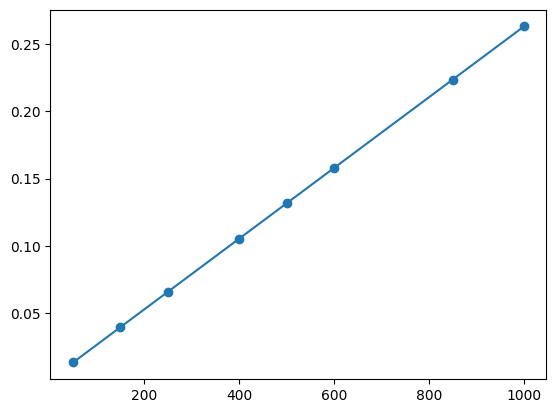

In [ ]:
pressure_levels = np.array(['50', '150', '250', '400', '500', '600', '850', '1000']).astype(int)
# x_axis = np.linspace(0, )

weighting = pressure_levels / sum(pressure_levels)
fig, ax = plt.subplots()

ax.plot(pressure_levels, weighting, marker='o')
# y_ticks = np.arange(0, 0.07, 0.005)
# ax.set_yticks(y_ticks)

In [ ]:
subset_levels = [int(i) for i in ['50', '150', '250', '400', '500', '600', '850', '1000']]
subset_weighting_1 = np.array([weighting[pressure_levels == i][0] for i in subset_levels])
subset_weighting_1

array([0.01315789, 0.03947368, 0.06578947, 0.10526316, 0.13157895,
       0.15789474, 0.22368421, 0.26315789])

In [ ]:
subset_weighting_1 / subset_weighting


array([4.09157895, 4.09157895, 4.09157895, 4.09157895, 4.09157895,
       4.09157895, 4.09157895, 4.09157895])